In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [3]:
current_centres_data = pd.read_excel('data/data.xlsx', sheet_name='Current Centres')

In [4]:
current_centres_data.head()

,CENTRE_NO,TYRE_BAYS,MOT_BAYS,SERVICE_BAYS,TOTAL_STAFF,AVG_DAILY_STAFF,AVG_SALARY,HOURS_OPEN_PER_WEEK,AREA_EV_PERC,AREA_POPULATION_DENSITY_PPSKM,ANNUAL_RENT,AREA_AFFLUENCE_GRADE,ANNUAL_REVENUE
0,223,4,0,1,7,4.8,27119,55.0,3.399573,6691.660592,43100,C,5.525422e+05
1,348,5,0,2,12,7.7,28152,52.5,4.842397,1325.129454,66400,C,1.072291e+06
2,68,3,0,2,8,6.3,29241,58.5,4.131909,3572.516731,40900,C,9.825545e+05
3,640,6,1,2,16,10.4,29346,58.5,3.687081,2701.672613,66700,D,1.763969e+06
4,967,6,1,2,14,9.4,29392,52.5,4.593888,1189.893236,106000,B,1.545497e+06


In [5]:
current_centres_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CENTRE_NO                      1006 non-null   int64  
 1   TYRE_BAYS                      1006 non-null   int64  
 2   MOT_BAYS                       1006 non-null   int64  
 3   SERVICE_BAYS                   1006 non-null   int64  
 4   TOTAL_STAFF                    1006 non-null   int64  
 5   AVG_DAILY_STAFF                1006 non-null   float64
 6   AVG_SALARY                     1006 non-null   int64  
 7   HOURS_OPEN_PER_WEEK            1006 non-null   float64
 8   AREA_EV_PERC                   994 non-null    float64
 9   AREA_POPULATION_DENSITY_PPSKM  994 non-null    float64
 10  ANNUAL_RENT                    1006 non-null   int64  
 11  AREA_AFFLUENCE_GRADE           1006 non-null   object 
 12  ANNUAL_REVENUE                 1006 non-null   f

In [6]:
current_centres_data = current_centres_data.drop_duplicates()

In [7]:
current_centres_data.shape

(999, 13)

In [8]:
current_centres_data.isnull().sum()

CENTRE_NO                         0
TYRE_BAYS                         0
MOT_BAYS                          0
SERVICE_BAYS                      0
TOTAL_STAFF                       0
AVG_DAILY_STAFF                   0
AVG_SALARY                        0
HOURS_OPEN_PER_WEEK               0
AREA_EV_PERC                     12
AREA_POPULATION_DENSITY_PPSKM    12
ANNUAL_RENT                       0
AREA_AFFLUENCE_GRADE              0
ANNUAL_REVENUE                    0
dtype: int64

In [9]:
from sklearn.impute import KNNImputer

In [10]:
imputer = KNNImputer(n_neighbors=2)

columns_to_impute = ["AREA_POPULATION_DENSITY_PPSKM", "AREA_EV_PERC"]
df_imputed = pd.DataFrame(imputer.fit_transform(current_centres_data[columns_to_impute]), 
                          columns=columns_to_impute)

df_imputed.isnull().sum()

AREA_POPULATION_DENSITY_PPSKM    0
AREA_EV_PERC                     0
dtype: int64

In [11]:
current_centres_data[columns_to_impute] = df_imputed
current_centres_data.isnull().sum()

CENTRE_NO                        0
TYRE_BAYS                        0
MOT_BAYS                         0
SERVICE_BAYS                     0
TOTAL_STAFF                      0
AVG_DAILY_STAFF                  0
AVG_SALARY                       0
HOURS_OPEN_PER_WEEK              0
AREA_EV_PERC                     0
AREA_POPULATION_DENSITY_PPSKM    0
ANNUAL_RENT                      0
AREA_AFFLUENCE_GRADE             0
ANNUAL_REVENUE                   0
dtype: int64

In [12]:
encoding_map = {
    "A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6
}
current_centres_data["AREA_AFFLUENCE_GRADE"] = current_centres_data["AREA_AFFLUENCE_GRADE"].map(encoding_map)

In [13]:
current_centres_data.skew()

CENTRE_NO                        0.000000
TYRE_BAYS                        0.029361
MOT_BAYS                         0.014035
SERVICE_BAYS                    -0.078255
TOTAL_STAFF                      0.133496
AVG_DAILY_STAFF                  0.326762
AVG_SALARY                       0.043697
HOURS_OPEN_PER_WEEK              0.063106
AREA_EV_PERC                    -0.173436
AREA_POPULATION_DENSITY_PPSKM    1.910603
ANNUAL_RENT                      0.750094
AREA_AFFLUENCE_GRADE             0.104165
ANNUAL_REVENUE                   1.112715
dtype: float64

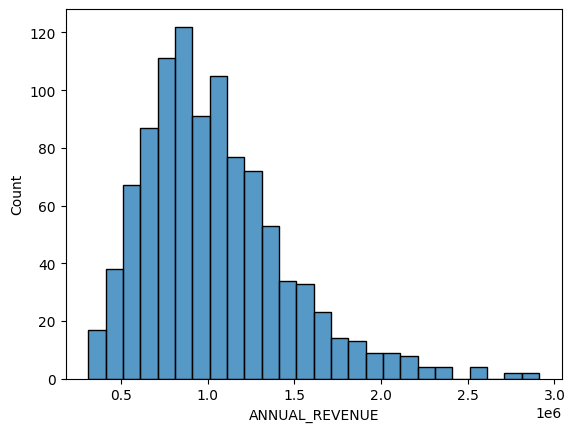

In [14]:
sns.histplot(current_centres_data["ANNUAL_REVENUE"])
plt.show()

In [15]:
current_centres_data[current_centres_data["ANNUAL_REVENUE"] > 2.5e6].shape

(8, 13)

In [16]:
current_centres_data = current_centres_data[current_centres_data["ANNUAL_REVENUE"] < 2.5e6]

In [17]:
current_centres_data.skew()

CENTRE_NO                        0.005227
TYRE_BAYS                        0.031152
MOT_BAYS                         0.030322
SERVICE_BAYS                    -0.062689
TOTAL_STAFF                      0.105771
AVG_DAILY_STAFF                  0.336328
AVG_SALARY                       0.041751
HOURS_OPEN_PER_WEEK              0.076191
AREA_EV_PERC                    -0.164613
AREA_POPULATION_DENSITY_PPSKM    1.920601
ANNUAL_RENT                      0.738602
AREA_AFFLUENCE_GRADE             0.102756
ANNUAL_REVENUE                   0.851631
dtype: float64

In [18]:
columns_to_treat_outliers = current_centres_data.columns[1:-1]
columns_to_treat_outliers

Index(['TYRE_BAYS', 'MOT_BAYS', 'SERVICE_BAYS', 'TOTAL_STAFF',
       'AVG_DAILY_STAFF', 'AVG_SALARY', 'HOURS_OPEN_PER_WEEK', 'AREA_EV_PERC',
       'AREA_POPULATION_DENSITY_PPSKM', 'ANNUAL_RENT', 'AREA_AFFLUENCE_GRADE'],
      dtype='object')

In [19]:
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    column[column < lower_bound] = lower_bound
    column[column > upper_bound] = upper_bound
    return column

In [20]:
new_df = current_centres_data.copy()

In [21]:
new_df[columns_to_treat_outliers] = new_df[columns_to_treat_outliers].apply(remove_outliers, axis=0)
new_df.skew()

C:\Users\princ\AppData\Local\Temp\ipykernel_23232\701915929.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '25057.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  column[column < lower_bound] = lower_bound
C:\Users\princ\AppData\Local\Temp\ipykernel_23232\701915929.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  column[column < lower_bound] = lower_bound


CENTRE_NO                        0.005227
TYRE_BAYS                        0.031152
MOT_BAYS                         0.030322
SERVICE_BAYS                    -0.062689
TOTAL_STAFF                      0.076611
AVG_DAILY_STAFF                  0.299959
AVG_SALARY                       0.006018
HOURS_OPEN_PER_WEEK              0.076191
AREA_EV_PERC                    -0.084025
AREA_POPULATION_DENSITY_PPSKM    0.958384
ANNUAL_RENT                      0.458318
AREA_AFFLUENCE_GRADE             0.067382
ANNUAL_REVENUE                   0.851631
dtype: float64

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

In [23]:
scaler = StandardScaler()
x_data = scaler.fit_transform(new_df[columns_to_treat_outliers])
x_data = pd.DataFrame(x_data, columns=columns_to_treat_outliers)
y_data = new_df["ANNUAL_REVENUE"]

x_data.shape, y_data.shape

((991, 11), (991,))

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [25]:
models_list = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Elastic Net": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVM": SVR(),
    "KNN": KNeighborsRegressor()
} # all are set to default hyperparameters

def model_selection(models, x, y):
    results = {}
    for model_name, model in models.items():
        kfold = KFold(n_splits=10, shuffle=True, random_state=42)
        cv_results = cross_val_score(model, x, y, cv=kfold, scoring='neg_mean_squared_error')
        results[model_name] = np.median(np.sqrt(np.abs(cv_results))) # medianRMSE
    return results

results = model_selection(models_list, x_data, y_data)

In [26]:
sorted(results.items(), key=lambda x: x[1])

[('Gradient Boosting', 194624.08827421523),
 ('Ridge', 204838.91855575616),
 ('Lasso', 205013.40182966558),
 ('Linear Regression', 205014.7091973662),
 ('Random Forest', 209077.20803576816),
 ('Elastic Net', 218992.2128394802),
 ('KNN', 219450.86848698917),
 ('Decision Tree', 303107.38739159843),
 ('SVM', 393127.0218861089)]

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
np.random.seed(42)

In [29]:
def model_tuning(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the model
    gbr = GradientBoostingRegressor()

    # Define the parameter grid
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Set up K-Fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Set up the grid search with K-Fold cross-validation
    grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, 
                            scoring='neg_mean_absolute_error', 
                            cv=kf, n_jobs=-1, verbose=1)

    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)

    # Get the best parameters and best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print("Best Parameters:", best_params)
    print("Best Cross-Validation Score (MAE):", -best_score)

    # Evaluate the best model on the test set
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    results = {
        "RMSE": root_mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred),
        "model": gbr
    }
    return results

results = model_tuning(x_test, y_test)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Score (MAE): 173072.84276166995


In [30]:
results

{'RMSE': 216743.61547136924,
 'MAE': 166102.10034086058,
 'R2': 0.6985734504076805,
 'model': GradientBoostingRegressor()}

In [31]:
def model_feature_selection(x_data, y_data): 
    model = GradientBoostingRegressor(
        n_estimators=100, 
        random_state=42,
        learning_rate=0.1,
        max_depth=3,
        min_samples_leaf=2,
        min_samples_split=5
    ) #hyper parameters from previous tuning
    # Fit the model to the training data
    model.fit(x_data, y_data)
    importances = model.feature_importances_

    feature_importance_df = pd.DataFrame({
        'Feature': range(x_data.shape[1]),
        'Importance': importances
    })

    # Sort the features by importance
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    print(feature_importance_df)

    # Select the top N features (e.g., top 10)
    top_n = 5
    top_features = feature_importance_df.head(top_n)['Feature'].values

    # Create a new dataset with only the selected features
    subset_columns = x_data.columns[top_features]
    return subset_columns.values

In [32]:
subset_x_data = model_feature_selection(x_data, y_data)
subset_x_data

    Feature  Importance
3         3    0.382995
2         2    0.137062
9         9    0.121883
6         6    0.112692
1         1    0.079856
4         4    0.052022
0         0    0.048148
8         8    0.033373
7         7    0.015975
5         5    0.013536
10       10    0.002457


array(['TOTAL_STAFF', 'SERVICE_BAYS', 'ANNUAL_RENT',
       'HOURS_OPEN_PER_WEEK', 'MOT_BAYS'], dtype=object)

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, shuffle=True, test_size=0.2, random_state=42)

In [65]:
model = GradientBoostingRegressor(
    n_estimators=100, 
    random_state=42,
    learning_rate=0.1,
    max_depth=3,
    min_samples_leaf=2,
    min_samples_split=5
) #hyper parameters from previous tuning
# Fit the model to the training data
model.fit(x_train, y_train)

GradientBoostingRegressor(min_samples_leaf=2, min_samples_split=5,
                          random_state=42)

In [66]:
y_pred = model.predict(x_test)

results = {
    "RMSE": root_mean_squared_error(y_test, y_pred),
    "MAE": mean_absolute_error(y_test, y_pred),
    "R2": r2_score(y_test, y_pred),
}
results

{'RMSE': 217435.85540287817,
 'MAE': 165086.98235524565,
 'R2': 0.7028300225903517}

In [67]:
(current_centres_data["ANNUAL_REVENUE"].median() - results["MAE"]) / (current_centres_data["ANNUAL_REVENUE"].median())

0.8295437184783179

In [68]:
(current_centres_data["ANNUAL_REVENUE"].mean() - results["MAE"]) / (current_centres_data["ANNUAL_REVENUE"].median())

0.8928646469096029

In [69]:
current_centres_data["ANNUAL_REVENUE"].median(), current_centres_data["ANNUAL_REVENUE"].mean()

(968500.432377709, 1029826.7789419665)

In [70]:
potential_centres = pd.read_excel(
    "data/data.xlsx",
    sheet_name="Potential Centres"
)
potential_centres.shape

(100, 12)

In [71]:
potential_centres["AREA_AFFLUENCE_GRADE"] = potential_centres["AREA_AFFLUENCE_GRADE"].map(encoding_map)

In [72]:
columns_to_impute = ["AREA_POPULATION_DENSITY_PPSKM", "AREA_EV_PERC"]
df_imputed = pd.DataFrame(
    imputer.fit_transform(potential_centres[columns_to_impute]), 
                          columns=columns_to_impute)

df_imputed.isnull().sum()

AREA_POPULATION_DENSITY_PPSKM    0
AREA_EV_PERC                     0
dtype: int64

In [73]:
potential_centres[columns_to_impute] = df_imputed

In [74]:
potential_centres_scaled = scaler.transform(potential_centres[columns_to_treat_outliers])
potential_centres_scaled = pd.DataFrame(
    potential_centres_scaled, columns=columns_to_treat_outliers)
potential_centres_scaled.head()

,TYRE_BAYS,MOT_BAYS,SERVICE_BAYS,TOTAL_STAFF,AVG_DAILY_STAFF,AVG_SALARY,HOURS_OPEN_PER_WEEK,AREA_EV_PERC,AREA_POPULATION_DENSITY_PPSKM,ANNUAL_RENT,AREA_AFFLUENCE_GRADE
0,0.533574,-0.984977,-1.031786,-0.358171,-1.007374,-3.133494,0.578368,-0.236241,0.599938,0.043144,-0.530220
1,0.533574,1.015253,0.969193,1.705478,1.138771,-1.646536,0.578368,0.854190,0.445124,1.090081,-0.530220
2,1.202059,-0.984977,-1.031786,-0.358171,-0.569385,0.362448,1.338933,0.778039,0.352026,0.140400,0.491059
3,-0.803396,1.015253,0.969193,0.329712,0.306592,-0.563267,1.338933,-1.749091,-1.038250,-1.318446,2.533615
4,0.533574,1.015253,-1.031786,0.329712,-0.306592,-0.418561,1.338933,0.817580,0.206294,0.798311,-0.530220


In [75]:
predictions = model.predict(potential_centres_scaled)
potential_centres["predictions"] = predictions

In [76]:
potential_centres.head()

,CENTRE_NO,TYRE_BAYS,MOT_BAYS,SERVICE_BAYS,TOTAL_STAFF,AVG_DAILY_STAFF,AVG_SALARY,HOURS_OPEN_PER_WEEK,AREA_EV_PERC,AREA_POPULATION_DENSITY_PPSKM,ANNUAL_RENT,AREA_AFFLUENCE_GRADE,predictions
0,58,5,0,1,9,4.7,24366,58.5,3.830469,2241.900879,51400,3,9.449108e+05
1,74,5,1,2,15,9.6,26565,58.5,4.628830,2092.164975,69700,3,1.832928e+06
2,23,6,0,1,9,5.7,29536,61.0,4.573076,2002.121410,53100,4,9.817020e+05
3,33,3,1,2,11,7.7,28167,61.0,2.722832,657.454164,27600,6,1.144088e+06
4,94,5,1,1,11,6.3,28381,61.0,4.602026,1861.169972,64600,3,1.265267e+06


In [77]:
potential_centres.sort_values("predictions", ascending=False).head(10)

,CENTRE_NO,TYRE_BAYS,MOT_BAYS,SERVICE_BAYS,TOTAL_STAFF,AVG_DAILY_STAFF,AVG_SALARY,HOURS_OPEN_PER_WEEK,AREA_EV_PERC,AREA_POPULATION_DENSITY_PPSKM,ANNUAL_RENT,AREA_AFFLUENCE_GRADE,predictions
1,74,5,1,2,15,9.6,26565,58.5,4.628830,2092.164975,69700,3,1.832928e+06
99,79,6,1,2,13,8.6,29294,58.5,4.461708,2839.099762,80700,3,1.809764e+06
67,91,8,1,2,18,10.1,29505,55.0,4.698264,1029.507564,101000,3,1.699816e+06
79,73,6,1,2,14,12.2,26487,58.5,3.911999,802.490827,66400,4,1.695460e+06
35,71,6,1,2,16,11.0,25602,52.5,3.968279,1571.738470,93900,2,1.661044e+06
40,61,4,1,2,11,5.8,29911,61.0,4.691694,1281.759961,67900,3,1.608195e+06
74,3,6,1,2,15,10.6,25363,52.5,5.069784,742.368208,69900,4,1.607240e+06
69,43,5,1,2,14,7.6,27160,52.5,4.959062,3795.174720,85900,2,1.603905e+06
48,85,4,1,2,11,7.3,30276,61.0,4.176372,3097.013569,47600,4,1.576378e+06
5,63,5,1,2,12,8.3,26228,55.0,5.431028,6345.249702,96400,2,1.555260e+06


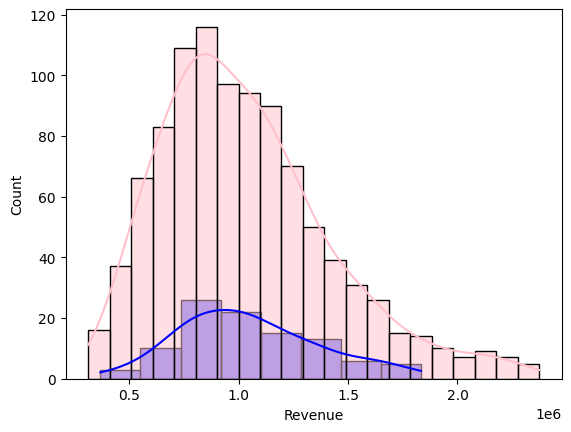

In [80]:
sns.histplot(x="predictions", 
             data=potential_centres, color="blue", alpha=0.5, label="Potential", kde=True)
sns.histplot(x="ANNUAL_REVENUE", 
             data=current_centres_data, color="pink", alpha=0.5, label="Current", kde=True)
plt.xlabel("Revenue")
plt.show()